In [1]:
# Automatically set base path to the project directory where the notebook is running
from pathlib import Path

# This gets the directory where the current notebook is located
base_path = Path.cwd()

print(f"📂 Base path automatically set to: {base_path}")

📂 Base path automatically set to: c:\GH\ASFPM-LLM-Data-Management-Workshop


# 📊 HDF5 Data Processing with Python and ChatGPT

Welcome to **HDF5 Data Processing**! In this session, we will use **ChatGPT**, **HDF5**, and **Python** to efficiently store, manipulate, and analyze large datasets.

### Enable the Table of Contents Sidebar in Jupyter Notebook  
For easier navigation:

1. Click on **View** in Jupyter Notebook.
2. Select **Left Sidebar** click **Show Table of Contents**.

## 📌 What You Will Learn
1. Set up your computer for **Python scripting** and **HDF5 file processing**.
2. Use **ChatGPT** to generate and debug **HDF5 queries**.
3. Learn best practices for **efficient data management** with HDF5.
4. Process and analyze **HDF5 datasets** using **Python and Numpy**.

## 🛠️ Required Programs
- **Python** (Version 3.12 or later)
- **HDF5 View** (Library for hierarchical data storage)
- **h5py** (Python library for working with HDF5 files)
- **Numpy** (For reading and analyzing HDF5 data)

---

## ▶️ Run the Test Cell  
Before we begin, run the test cell below to check your setup.

This test will:
- ✅ Verify that **HDF5 (h5py)** is available.
- ✅ Check if **Pandas** is installed.
- ✅ Confirm that an **HDF5 file can be created and accessed**.




In [2]:
# Checking HDF5 and Pandas Setup

print("🔍 Checking system setup...\n")

# Test h5py (HDF5 support)
try:
    import h5py
    with h5py.File("test.hdf5", "w") as f:
        f.create_dataset("test_data", data=[1, 2, 3, 4, 5])
    print("✅ HDF5 (h5py) is available and working!")
except Exception as e:
    print(f"❌ HDF5 test failed: {e}")

# Test Pandas
try:
    import pandas as pd
    print("✅ Pandas imported successfully!")
except ImportError:
    print("❌ Pandas is not installed. Run `pip install pandas`.")

# Confirm Python version
import sys
print(f"🐍 Python version: {sys.version.split()[0]}")

print("\n✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.")


🔍 Checking system setup...

✅ HDF5 (h5py) is available and working!
✅ Pandas imported successfully!
🐍 Python version: 3.12.9

✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.


# 📊 Using ChatGPT's Code Interpreter to Explore HDF5 Data Structure

## Purpose

Use ChatGPT to help you understand and analyze HDF5 data. Before performing any analysis, it's important to understand the file structure as a reference, so ChatGPT can handle the coding, syntax, and data types and you can focus on describing the actual task you want to complete, such as mapping wsel/velocity or calculating shear stress.

## ChatGPT Prompt for HDF Explorer Function

Prompt ChatGPT:

```
Write a function that will recursively explore an HDF File path.  List all attributes, groups, datasets, compound datasets and objects.  For each, list the full path, type, data types, dataset dataspace and datatype,to ensure a complete readout of all info needed to extract data from the HDF path.  The function should be robust, comprehensive and provide information for all different data types that might be present.

Use the provided TIMDEPNC.HDF5 and RAS_Muncie.p04.hdf to test the function by reading he following paths:


TIMDEPNC.HDF5: TIMDEP OUTPUT RESULTS/

RAS_Muncie.p04.hdf: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area

```
Provide the files and work with GPT until it achieves a desirable result.  

Then, ask for a script for local execution:

```
Provide a jupyter notebook cell for my local notebook.  The HDF files are located in the same folder as the notebook, under the "Data\Hdf5\" subfolder.  
```




![ChatGPT HDF Explorer](images/chatgpt-hdfexplorer.png)
[ChatGPT Conversation for HDF Exploration](https://chatgpt.com/share/67f1ad34-2f60-8010-8381-6f3d449aa812)

In [3]:
import h5py
import os

def explore_hdf5(filepath, target_path="/", indent=0):
    """
    Recursively explores an HDF5 file and prints information about each group, dataset, and attribute.

    Parameters:
    - filepath: str, path to the HDF5 file
    - target_path: str, internal path in the HDF5 file to start exploration
    - indent: int, current indentation level for pretty printing
    """
    def print_info(name, obj, level):
        spacing = ' ' * level
        full_path = obj.name
        obj_type = type(obj).__name__
        print(f"{spacing}Path: {full_path}")
        print(f"{spacing}Type: {obj_type}")

        if isinstance(obj, h5py.Dataset):
            print(f"{spacing} - Shape: {obj.shape}")
            print(f"{spacing} - Data type: {obj.dtype}")
            try:
                print(f"{spacing} - Dataspace (dims): {obj.shape}")
                print(f"{spacing} - Datatype (HDF5 native): {obj.id.get_type().get_class()}")
            except Exception as e:
                print(f"{spacing} - Error reading dataspace/datatype: {e}")
        elif isinstance(obj, h5py.Group):
            print(f"{spacing} - Contains: {len(obj)} items")

        # Print attributes
        if obj.attrs:
            print(f"{spacing} - Attributes:")
            for key, val in obj.attrs.items():
                print(f"{spacing}   * {key}: {val}")
        print("\n")

    with h5py.File(filepath, 'r') as file:
        def recursive_visit(group, level=0):
            for key in group:
                item = group[key]
                print_info(key, item, level)
                if isinstance(item, h5py.Group):
                    recursive_visit(item, level + 2)

        root = file[target_path]
        print_info(target_path, root, indent)
        if isinstance(root, h5py.Group):
            recursive_visit(root, indent + 2)



In [4]:
# Explore the specified paths (FLO2D)
flo2d_timdepnc_file = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")
print("Exploring TIMDEPNC.HDF5:\n")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/")



Exploring TIMDEPNC.HDF5:

Path: /TIMDEP OUTPUT RESULTS
Type: Group
 - Contains: 14 items
 - Attributes:
   * Grouptype: [b'Generic']


  Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET
  Type: Group
   - Contains: 4 items
   - Attributes:
     * Data Type: [0]
     * DatasetCompression: [9]
     * DatasetUnits: [b'ft or m']
     * Grouptype: [b'DATASET SCALAR']
     * TimeUnits: [b'Hours']


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Maxs
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Mins
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Times
    Type: Dataset
     - Shape: (200,)
     - Data type: float64
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESU

In [5]:
# Explore the specified paths (HEC-RAS 2D)
ras_file = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
print("\nExploring RAS_Muncie.p04.hdf:\n")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area")



Exploring RAS_Muncie.p04.hdf:

Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area
Type: Group
 - Contains: 3 items


  Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations
  Type: Group
   - Contains: 18 items


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Iteration Number
    Type: Dataset
     - Shape: (289, 1)
     - Data type: int32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF5 native): 0
     - Attributes:
       * Description: b'Sum of inner-loop iterations over all outer-loop iterations'


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Max Volume Residual
    Type: Dataset
     - Shape: (289, 1)
     - Data type: float32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF

-----

# User-Guided Data Exploration of HDF5 Files 

Now that we have a detailed description of the HDF's data contents, let's build functions to extract the data.  While this detailed information is no required, it is very helpful to reduce up-front errors and iterations.  To include this information in ChatGPT, just copy the cell output and paste into ChatGPT:   


Go to the previous output cell:  
![VS Code - Copy Cell Output](images/vscode-copycelloutput.png)  
Copy the Cell Output and paste into ChatGPT

-----

## Prompt for Extracting **FLO2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/TIMDEPNC.HDF5` in HDFView

- **Water Surface Elevation Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/`, containing water surface values for each grid element over time.
- **Depth Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/FLOW DEPTH/`, containing depth values for each grid element over time.
- **Time Intervals**: Found in `TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times`, representing the time steps for the depth and velocity data.
- **X and Y Coordinates** Found in TIMDEPNC.HDF5, `/TIMDEP OUTPUT RESULTS/X-Coordinate/Values` and `/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`

Follow-up: 
`Provide a code cell for my local notebook.  The local path for the HDF5 file is Data/Hdf5/TIMDEPNC.HDF5`


1. Upload TIMDEPNC.HDF5 and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [6]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT

explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/FLOW DEPTH/")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/X-Coordinate/Values")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values")

Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION
Type: Group
 - Contains: 4 items
 - Attributes:
   * Data Type: [0]
   * DatasetCompression: [9]
   * DatasetUnits: [b'ft or m']
   * Grouptype: [b'DATASET SCALAR']
   * TimeUnits: [b'Hours']


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Maxs
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Mins
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times
  Type: Dataset
   - Shape: (200,)
   - Data type: float64
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values
  Type: Dataset
   - Shape: (200, 8588)
   - Data type: float32
   - Dataspace (dims): (200, 8588)
   - Datatype (HDF5 native): 1


Path: /TIMDE

If you don't see something similar to this output, adjust the prompt, provide corrections or try again!

![HDF-Flo2D WSE Map in ChatGPT](images/hdf-flo2d_wse_map.png)

Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step"`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

[ChatGPT Conversation - Flo2D HDF Data Extraction](https://chatgpt.com/share/67f29600-f218-8010-8a3e-42ea9300c60d)

Code Cells from these follow-up requests:

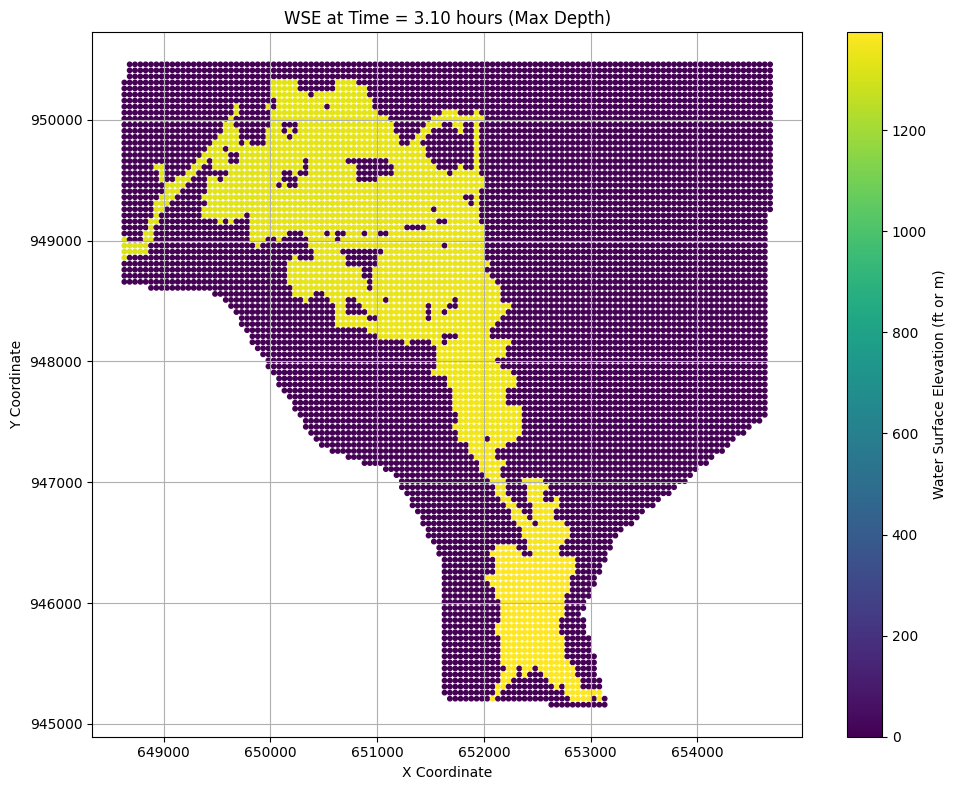

In [7]:
import h5py
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Set the local path to your HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the HDF5 file
with h5py.File(hdf5_path, "r") as f:
    # Load flow depth values and compute the timestep with maximum total depth
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    max_depth_timestep = np.argmax(np.sum(depth_values, axis=1))

    # Load water surface elevation values and time
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]

    # Load X and Y coordinates
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Create an xarray DataArray for Water Surface Elevation
wse_xr_flo = xr.DataArray(
    data=wse_values,
    dims=["time", "element"],
    coords={"time": wse_times, "x": (["element"], x_coords), "y": (["element"], y_coords)},
    name="water_surface_elevation"
)

# Extract data for the time step with maximum depth
wse_at_max_depth = wse_xr_flo.sel(time=wse_times[max_depth_timestep])

# Plot the water surface elevation at the selected time
plt.figure(figsize=(10, 8))
plt.scatter(
    wse_at_max_depth['x'],
    wse_at_max_depth['y'],
    c=wse_at_max_depth.values,
    s=10,
    cmap='viridis'
)
plt.colorbar(label='Water Surface Elevation (ft or m)')
plt.title(f"WSE at Time = {wse_at_max_depth.time.item():.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


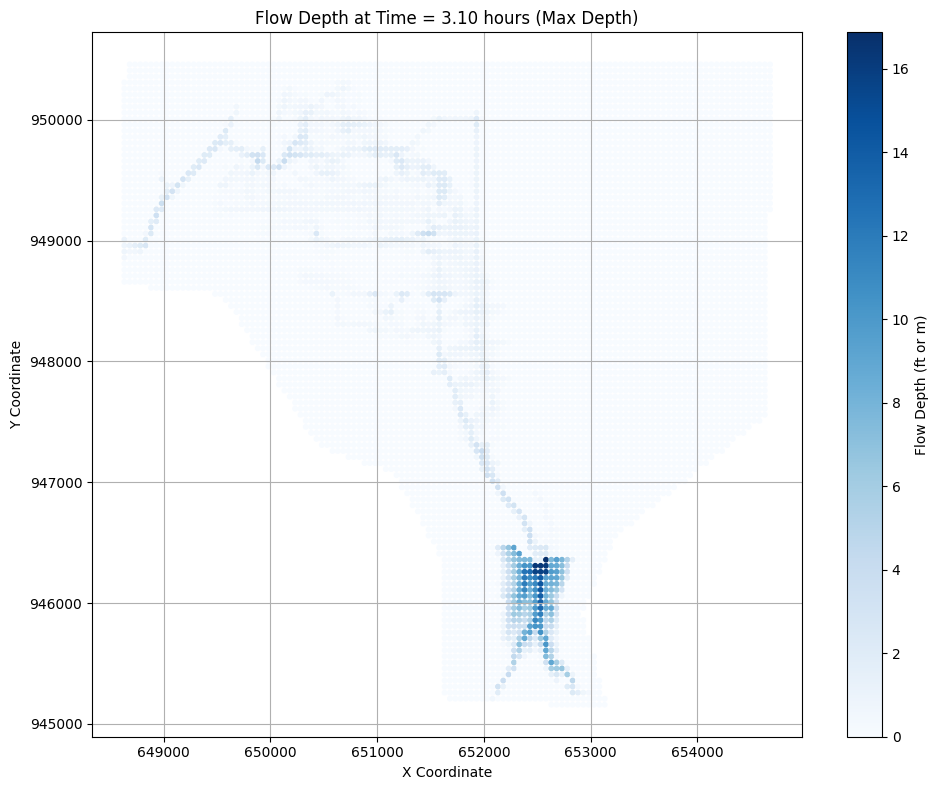

In [8]:
# Extract flow depth at the same time step (already found as max_depth_timestep)
with h5py.File(hdf5_path, "r") as f:
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Get depth data at max depth time step
depth_at_max_time = depth_values[max_depth_timestep, :]

# Plot the Flow Depth
plt.figure(figsize=(10, 8))
plt.scatter(
    x_coords,
    y_coords,
    c=depth_at_max_time,
    s=10,
    cmap='Blues'
)
plt.colorbar(label='Flow Depth (ft or m)')
plt.title(f"Flow Depth at Time = {wse_times[max_depth_timestep]:.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install packages (run only once in your notebook)
!pip install xarray matplotlib imageio --quiet

### Imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm  # Optional: for progress bar
import os

### Load the HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"
with h5py.File(hdf5_path, "r") as f:
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

### Create a folder to store frames
os.makedirs("frames", exist_ok=True)

### Generate and save each frame
filenames = []
for i in tqdm(range(len(wse_times))):
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c=wse_values[i], s=10, cmap='viridis')
    plt.colorbar(label="Water Surface Elevation (ft or m)")
    plt.title(f"WSE at Time = {wse_times[i]:.2f} hrs")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()

    fname = f"frames/frame_{i:03d}.png"
    plt.savefig(fname)
    plt.close()
    filenames.append(fname)

### Create GIF
gif_path = "wse_animation_FLO2D.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### Clean up frames (optional)
for filename in filenames:
    os.remove(filename)

print(f"Animation saved as {gif_path}")

-----

## Prompt for Extracting **HEC-RAS 2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/RAS_Muncie.p04.hdf` in HDFView

- **Mesh Name Lookup**: 2D area names can be found in /Results/Unsteady/Geometry Info/2D Area(s).  Results are available for each 2D flow area, and the 2D area name is part of the path so it must be retrieved first (as a list).  In the example HDF file provided, flow_area_name is "2D Interior Area" (only one 2D area)

- **Mesh Cell Centers** can be found here: `/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate`
    
- **Time Date Stamp**: Time stamps are available at this path: `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp` Time Date Stamp is in this format: 02JAN1900 00:00:00

- **Water Surface Elevation Time Series Results**  Water Surface Elevations for each Mesh Cell are located at `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`


Instructions: 
1. Upload RAS_Muncie.p04.hdf and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [9]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT
explore_hdf5(ras_file, target_path="/Results/Unsteady/Geometry Info/2D Area(s)")
explore_hdf5(ras_file, target_path="/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface")

Path: /Results/Unsteady/Geometry Info/2D Area(s)
Type: Dataset
 - Shape: (1,)
 - Data type: |S64
 - Dataspace (dims): (1,)
 - Datatype (HDF5 native): 3


Path: /Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate
Type: Dataset
 - Shape: (5765, 2)
 - Data type: float64
 - Dataspace (dims): (5765, 2)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Plot: b'False'
   * Column: [b'X' b'Y']
   * Row: b'Cell'


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp
Type: Dataset
 - Shape: (289,)
 - Data type: |S19
 - Dataspace (dims): (289,)
 - Datatype (HDF5 native): 3


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface
Type: Dataset
 - Shape: (289, 5765)
 - Data type: float32
 - Dataspace (dims): (289, 5765)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Interpolate: b'True'
   * Can Plot: b'True'
   * Columns: b'Cells'
   * Coverage: b'Wet'
   * Location: b

Example Output from ChatGPT's Code Interpreter
![ChatGPT - HEC-RAS 2D WSE Map](images/hdf-hecras_wse_map.png)
[ChatGPT Conversation for Following Code Cells](https://chatgpt.com/share/67f2a034-5874-8010-9472-bb32f2f38252)



Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step.  Use '/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation' to calculate depth for each cell`

- `Provide a code cell for my local jupyter notebook for both WSE and Depth. The local path is Data/Hdf5/RAS_Muncie.p04.hdf`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

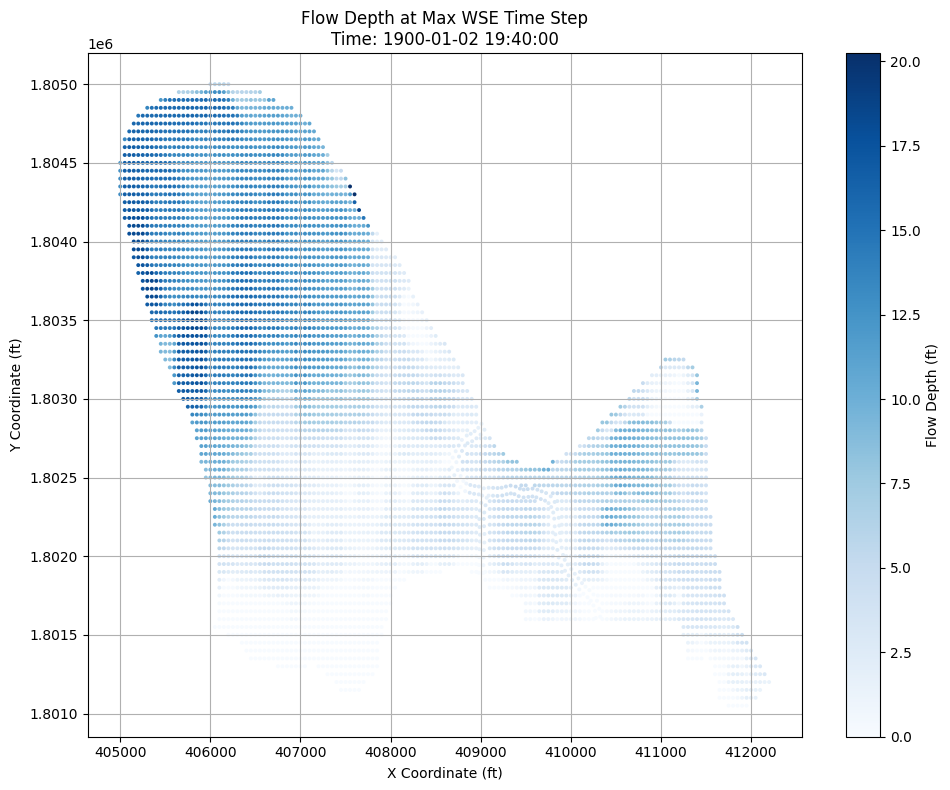

In [10]:
import h5py
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# === Load the HDF5 file ===
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:

    # === Load datasets ===
    wse = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    min_elev = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

# === Parse time and coordinates ===
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

# === Create xarray for WSE ===
wse_xr_ras = xr.DataArray(
    wse,
    dims=["time", "cell"],
    coords={"time": time_index, "x": ("cell", x_coords), "y": ("cell", y_coords)},
    name="water_surface_elevation",
    attrs={"units": "ft"}
)

# === Identify timestep with maximum average WSE ===
max_time_idx = wse_xr_ras.mean(dim="cell").argmax().item()
max_time = time_index[max_time_idx]
wse_at_max = wse_xr_ras.sel(time=max_time)

# === Calculate Flow Depth ===
flow_depth = wse_at_max - min_elev

# === Plot ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    wse_xr_ras["x"].values,
    wse_xr_ras["y"].values,
    c=flow_depth.values,
    cmap="Blues",
    s=8,
    edgecolor="none"
)
plt.colorbar(scatter, label="Flow Depth (ft)")
plt.title(f"Flow Depth at Max WSE Time Step\nTime: {max_time}")
plt.xlabel("X Coordinate (ft)")
plt.ylabel("Y Coordinate (ft)")
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install required packages (run this in a Jupyter notebook cell)
!pip install xarray matplotlib imageio --quiet

import h5py
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

### --- Load Data ---
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:
    wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

### --- Set Up xarray ---
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

wse_xr_ras = xr.DataArray(
    wse_data,
    dims=["time", "cell"],
    coords={
        "time": time_index,
        "x": ("cell", x_coords),
        "y": ("cell", y_coords)
    },
    name="water_surface_elevation"
)

### --- Prepare Animation ---
filenames = []
vmin, vmax = np.nanmin(wse_data), np.nanmax(wse_data)  # consistent color scale

for i, t in tqdm(enumerate(wse_xr_ras.time.values), total=wse_xr_ras.sizes['time']):
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(wse_xr_ras.x, wse_xr_ras.y, c=wse_xr_ras.sel(time=t), cmap="viridis", s=8, vmin=vmin, vmax=vmax)
    plt.colorbar(sc, ax=ax, label="Water Surface Elevation (ft)")
    ax.set_title(f"WSE Time: {pd.to_datetime(t).strftime('%Y-%m-%d %H:%M')}")
    ax.set_xlabel("X Coordinate (ft)")
    ax.set_ylabel("Y Coordinate (ft)")
    ax.grid(True)
    plt.tight_layout()

    filename = f"_frame_{i:04d}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

### --- Create GIF ---
with imageio.get_writer("wse_animation_RAS.gif", mode="I", duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### --- Cleanup PNGs ---
import os
for filename in filenames:
    os.remove(filename)

print("✅ Animation saved as wse_animation.gif")


------

# Using your Jupyter Notebook as Context to Add Functionality

For the rest of the exercise, we will use the new line of reasoning models (o1), using this notebook as context.  

Provide this notebook to any of the following models:

- ChatGPT
    - [o1](https://chatgpt.com/?model=o1)
    - [o3-mini high](https://chatgpt.com/?model=o3-mini-high)

- [Anthropic's Claude](https://claude.ai/)

- [Google's Gemini 2.5](https://aistudio.google.com/prompts/new_chat)

These are all State of the Art, Long Context Models with Reasoning Capability.  This enables longer scripts to be coded with a more consistent output and reduced errors. 

<div class="alert alert-block alert-info">
<b>Note:</b> Clear image outputs before saving and uploading.  The file size should be around 66KB.
</div>  


## OPTION 1: FLO2D: Calculate Flow x Depth and Save back to HDF

- **Objective**: Create a Python script to manipulate HDF5 file data.
- **File Path**: `Data\Hdf5\TIMDEPNC.HDF5`
- **Data Tasks**:
  - **Add Table `dep_x_vel`**: Multiply depth and velocity data.
  - **Add Table `dep_x_sqvel`**: Multiply depth by velocity squared.
- **Groups and Datasets**:
  - **Group `TIMDEP OUTPUT RESULTS/FLOW DEPTH`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
  - **Group `TIMDEP OUTPUT RESULTS/MAX VEL`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
- **Operations**:
  - **Delete Existing Datasets**: Check and delete existing datasets `dep_x_vel` and `dep_x_sqvel` if present.
  - **Calculate and Store New Data**: Compute and store new datasets for `dep_x_vel` and `dep_x_sqvel`.
- **Dependencies**: Utilize `h5py` for HDF5 interaction and `numpy` for mathematical operations.
- **Request**: Provide a Python script that executes the above operations as described.

In [ ]:
# Insert Code Here

Processing file: Data\Hdf5\TIMDEPNC.HDF5
Loading depth and velocity data...
Calculating depth × velocity...
Calculating depth × velocity²...
Checking for existing datasets...
  - Deleting existing dataset: dep_x_vel
  - Deleting existing dataset: dep_x_sqvel
Creating new datasets...

Verification:
  - Created dep_x_vel: Shape (200, 8588), Type float32
  - Created dep_x_sqvel: Shape (200, 8588), Type float32

Creating visualizations...


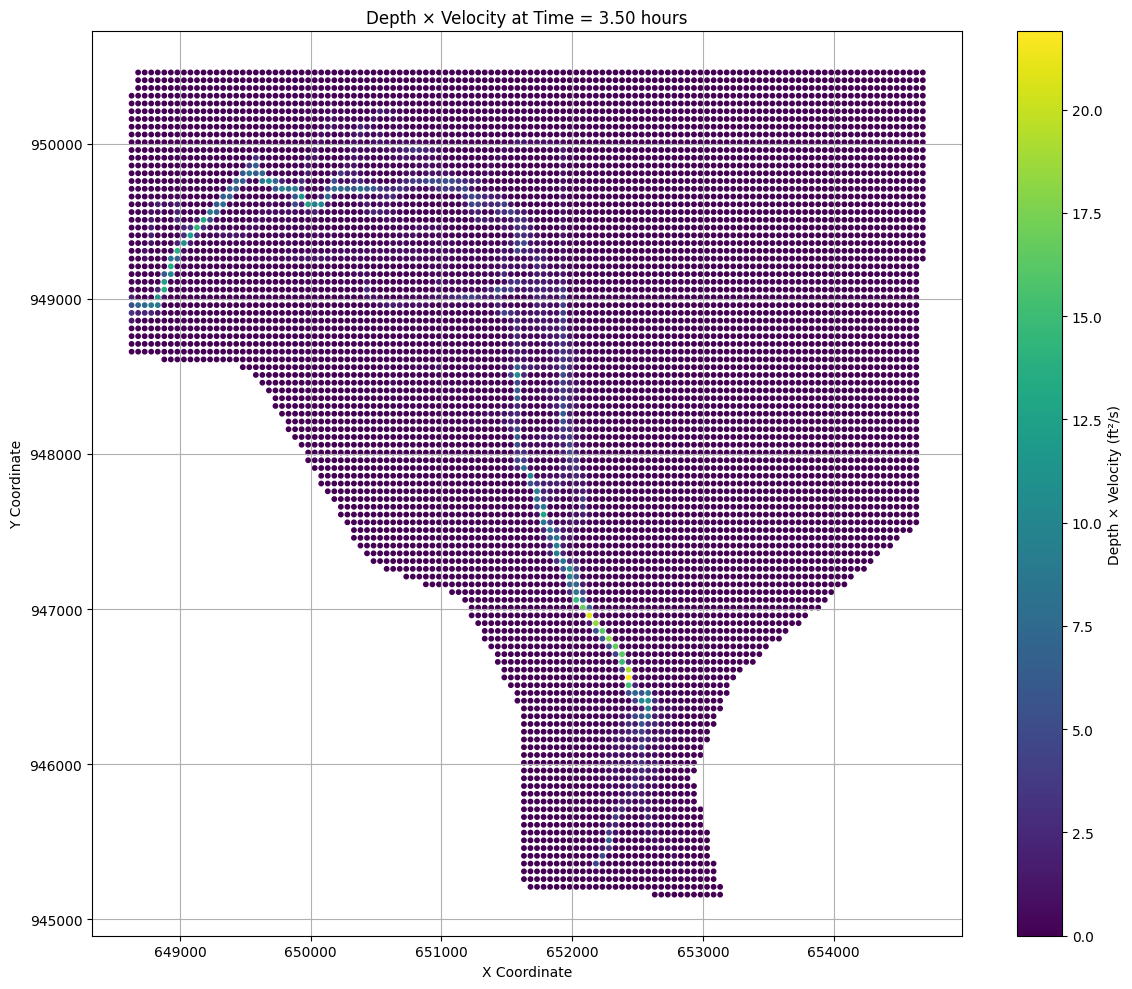

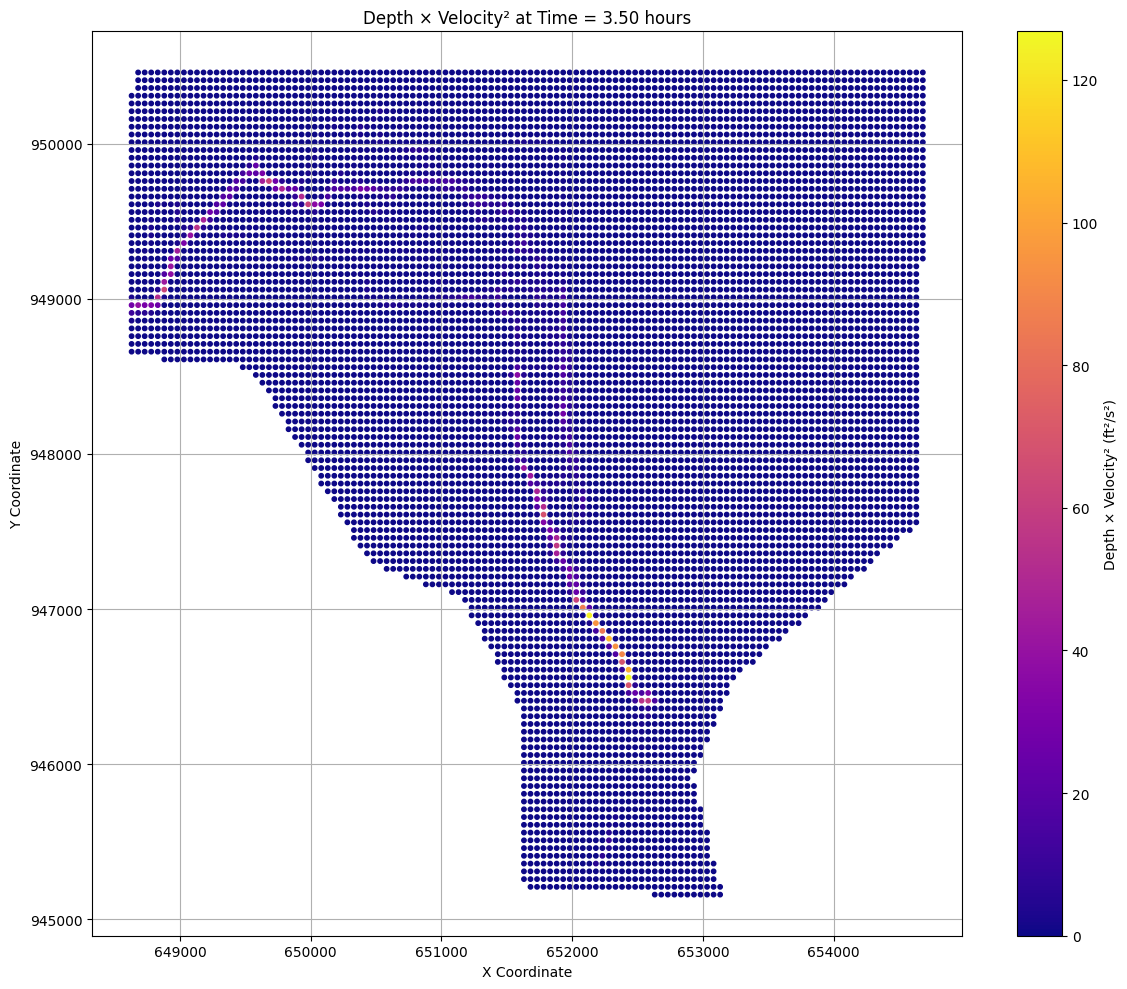

Depth × Velocity map: maximum values at time = 3.50 hours
Depth × Velocity² map: maximum values at time = 3.50 hours

Operation complete!


In [11]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

def calculate_save_and_map_flow_metrics():
    """
    Calculate depth × velocity and depth × velocity² metrics,
    save them to the FLO2D HDF5 file, and create visualizations.
    """
    # Set the file path
    hdf5_path = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")
    
    print(f"Processing file: {hdf5_path}")
    if not os.path.exists(hdf5_path):
        print(f"Error: File {hdf5_path} not found")
        return
    
    # Open the HDF5 file in read/write mode
    with h5py.File(hdf5_path, "r+") as f:
        # Define group path
        timdep_results_path = "/TIMDEP OUTPUT RESULTS"
        
        # Load the depth and velocity data
        print("Loading depth and velocity data...")
        depth_values = f[f"{timdep_results_path}/FLOW DEPTH/Values"][:]
        velocity_values = f[f"{timdep_results_path}/MAX VEL/Values"][:]
        
        # Load time data
        times = f[f"{timdep_results_path}/FLOW DEPTH/Times"][:]
        
        # Calculate new metrics
        print("Calculating depth × velocity...")
        dep_x_vel = depth_values * velocity_values
        
        print("Calculating depth × velocity²...")
        dep_x_sqvel = depth_values * (velocity_values ** 2)
        
        # Check if datasets already exist and delete them
        print("Checking for existing datasets...")
        for dataset_name in ["dep_x_vel", "dep_x_sqvel"]:
            full_path = f"{timdep_results_path}/{dataset_name}"
            if full_path in f:
                print(f"  - Deleting existing dataset: {dataset_name}")
                del f[full_path]
        
        # Create new datasets
        print("Creating new datasets...")
        f.create_dataset(f"{timdep_results_path}/dep_x_vel", data=dep_x_vel)
        f.create_dataset(f"{timdep_results_path}/dep_x_sqvel", data=dep_x_sqvel)
        
        # Load coordinates for mapping
        x_coords = f[f"{timdep_results_path}/X-Coordinate/Values"][:].flatten()
        y_coords = f[f"{timdep_results_path}/Y-Coordinate/Values"][:].flatten()
        
        # Verify results
        print("\nVerification:")
        for dataset_name in ["dep_x_vel", "dep_x_sqvel"]:
            full_path = f"{timdep_results_path}/{dataset_name}"
            if full_path in f:
                shape = f[full_path].shape
                dtype = f[full_path].dtype
                print(f"  - Created {dataset_name}: Shape {shape}, Type {dtype}")
            else:
                print(f"  - ERROR: Failed to create {dataset_name}")
    
    # Now create maps of the results
    print("\nCreating visualizations...")
    with h5py.File(hdf5_path, "r") as f:
        # Load the coordinates and time data
        x_coords = f[f"{timdep_results_path}/X-Coordinate/Values"][:].flatten()
        y_coords = f[f"{timdep_results_path}/Y-Coordinate/Values"][:].flatten()
        times = f[f"{timdep_results_path}/FLOW DEPTH/Times"][:]
        
        # Load the calculated datasets
        dep_x_vel = f[f"{timdep_results_path}/dep_x_vel"][:]
        dep_x_sqvel = f[f"{timdep_results_path}/dep_x_sqvel"][:]
        
        # Find the time step with maximum average value for each metric
        max_vel_timestep = np.argmax(np.nanmean(dep_x_vel, axis=1))
        max_sqvel_timestep = np.argmax(np.nanmean(dep_x_sqvel, axis=1))
        
        # Plot depth × velocity
        plt.figure(figsize=(12, 10))
        scatter = plt.scatter(
            x_coords, 
            y_coords,
            c=dep_x_vel[max_vel_timestep, :],
            s=10,
            cmap='viridis'
        )
        plt.colorbar(scatter, label='Depth × Velocity (ft²/s)')
        plt.title(f'Depth × Velocity at Time = {times[max_vel_timestep]:.2f} hours')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('depth_x_velocity.png')
        plt.show()
        
        # Plot depth × velocity²
        plt.figure(figsize=(12, 10))
        scatter = plt.scatter(
            x_coords, 
            y_coords,
            c=dep_x_sqvel[max_sqvel_timestep, :],
            s=10,
            cmap='plasma'
        )
        plt.colorbar(scatter, label='Depth × Velocity² (ft²/s²)')
        plt.title(f'Depth × Velocity² at Time = {times[max_sqvel_timestep]:.2f} hours')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('depth_x_velocity_squared.png')
        plt.show()
        
        print(f"Depth × Velocity map: maximum values at time = {times[max_vel_timestep]:.2f} hours")
        print(f"Depth × Velocity² map: maximum values at time = {times[max_sqvel_timestep]:.2f} hours")
        print("\nOperation complete!")

# Execute the function
calculate_save_and_map_flow_metrics()

## OPTION 2: FLO2D Flood Wave Arrival Time

`Assuming the notebook has been run and the xarrays above are present, add a code cell for FLO2D that will find the time stamp of each grid cell, at the time where it exceeds 1ft in depth.  This indicates the first arrival of the flood wave. Create a function to find this and calculate time_to_1ft and save the daaset back to the hdf.  The function should overwrite the dataset in the hdf if it exists.  I should also plot a map of the flood wave arrival time time in hr.`

In [12]:
# Insert Code Here

Processing file: Data\Hdf5\TIMDEPNC.HDF5
Loading depth data and time values...
Analyzing 8588 grid cells across 200 time steps...
Deleting existing dataset: /TIMDEP OUTPUT RESULTS/time_to_1_ft
Saving flood wave arrival times to HDF5...
Dataset created: /TIMDEP OUTPUT RESULTS/time_to_1_ft

Flood wave statistics:
- First cell flooded at: 0.05 hours
- Last cell flooded at: 4.80 hours
- Wave travel time: 4.75 hours
- Cells flooded (>1.0ft): 622 of 8588 (7.2%)


c:\Users\billk\anaconda3\envs\cmdr_pip_1\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


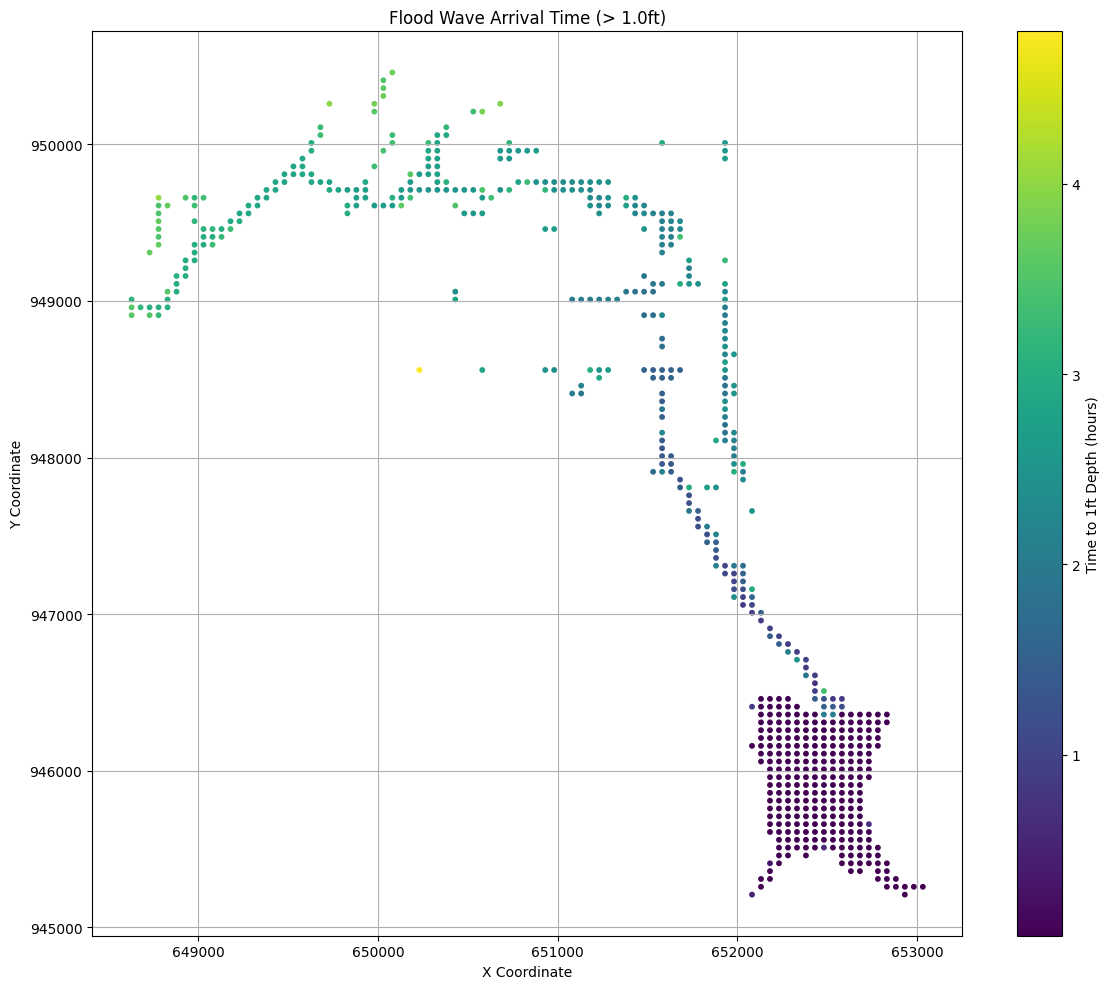


Operation complete!


In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_flood_arrival_time(threshold_depth=1.0):
    """
    Calculate the time when flood depth first exceeds the threshold (default 1ft)
    for each grid cell in the FLO2D simulation and save to HDF5.
    
    Parameters:
    -----------
    threshold_depth : float
        Depth threshold in feet (default: 1.0 ft)
    """
    # Set file path
    hdf5_path = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")
    
    print(f"Processing file: {hdf5_path}")
    if not os.path.exists(hdf5_path):
        print(f"Error: File {hdf5_path} not found")
        return
    
    # Open the HDF5 file
    with h5py.File(hdf5_path, "r+") as f:
        # Load the depth data and time values
        print("Loading depth data and time values...")
        depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
        time_hours = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times"][:]
        
        # Get coordinates for mapping
        x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
        y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()
        
        # Get dimensions
        num_timesteps, num_cells = depth_values.shape
        
        print(f"Analyzing {num_cells} grid cells across {num_timesteps} time steps...")
        
        # Initialize array to store arrival times
        time_to_1ft = np.full(num_cells, np.nan)
        
        # For each cell, find the first time step where depth exceeds the threshold
        for cell_idx in range(num_cells):
            # Find indices where depth exceeds threshold
            exceed_indices = np.where(depth_values[:, cell_idx] >= threshold_depth)[0]
            
            # If any time steps exceed threshold, record the first one
            if len(exceed_indices) > 0:
                first_exceed_idx = exceed_indices[0]
                time_to_1ft[cell_idx] = time_hours[first_exceed_idx]
        
        # Check if dataset already exists and delete it
        dataset_path = "/TIMDEP OUTPUT RESULTS/time_to_1_ft"
        if dataset_path in f:
            print(f"Deleting existing dataset: {dataset_path}")
            del f[dataset_path]
        
        # Save the calculated arrival times
        print("Saving flood wave arrival times to HDF5...")
        f.create_dataset(dataset_path, data=time_to_1ft)
        
        print(f"Dataset created: {dataset_path}")
    
    # Plot the flood wave arrival times
    plt.figure(figsize=(12, 10))
    
    # Create a masked array to ignore cells that never get flooded
    masked_data = np.ma.masked_invalid(time_to_1ft)
    
    # Plot with a sequential colormap that shows progression of flood
    scatter = plt.scatter(
        x_coords, 
        y_coords,
        c=masked_data,
        s=10,
        cmap='viridis',
        vmin=np.nanmin(time_to_1ft),
        vmax=np.nanmax(time_to_1ft)
    )
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Time to 1ft Depth (hours)')
    
    plt.title(f'Flood Wave Arrival Time (> {threshold_depth}ft)')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    
    # Create a custom colorbar label
    start_time = np.nanmin(time_to_1ft)
    end_time = np.nanmax(time_to_1ft)
    time_range = end_time - start_time
    
    # Print stats
    flooded_cells = np.sum(~np.isnan(time_to_1ft))
    percent_flooded = (flooded_cells / num_cells) * 100
    
    print(f"\nFlood wave statistics:")
    print(f"- First cell flooded at: {start_time:.2f} hours")
    print(f"- Last cell flooded at: {end_time:.2f} hours")
    print(f"- Wave travel time: {time_range:.2f} hours")
    print(f"- Cells flooded (>{threshold_depth}ft): {flooded_cells} of {num_cells} ({percent_flooded:.1f}%)")
    
    plt.tight_layout()
    plt.savefig('flood_wave_arrival_time.png', dpi=300)
    plt.show()
    
    print("\nOperation complete!")

# Run the function with default 1ft threshold
calculate_flood_arrival_time()

# OPTION 3: RAS 2D Flood Wave Arrival Time

'Assuming the notebook has been run and the xarrays above are present, add a code cell similar to Option 2, but for HEC-RAS 2D`




In [13]:
# Insert Code Here

Processing file: Data\Hdf5\RAS_Muncie.p04.hdf
Loading data...
Analyzing 5765 grid cells across 289 time steps...
Calculating water depths...
Finding when cells first exceed 1.0ft depth...

HEC-RAS 2D Flood wave statistics:
- First cell flooded at: 3.25 hours from start
- Last cell flooded at: 19.42 hours from start
- Wave travel time: 16.17 hours
- Cells flooded (>1.0ft): 4603 of 5765 (79.8%)


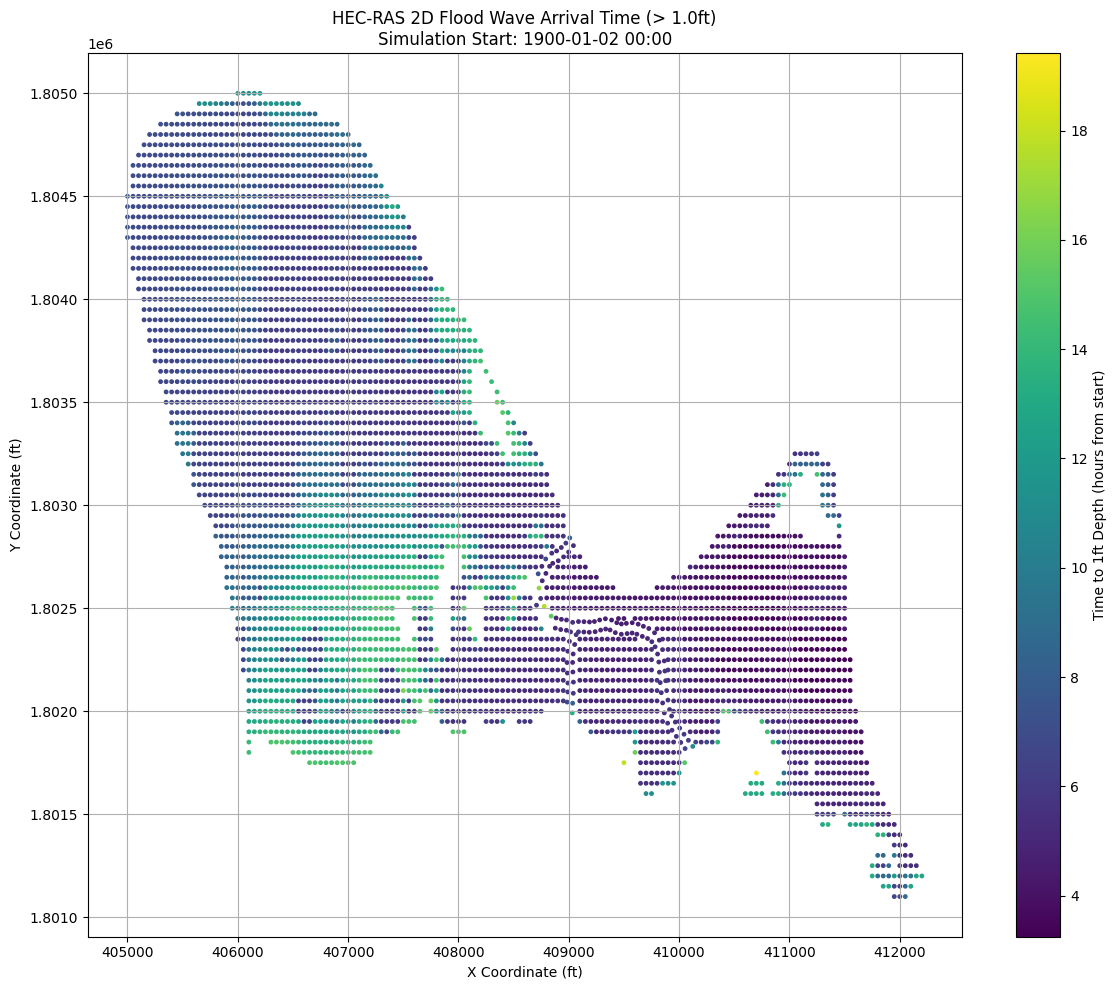


Saving results to RAS_flood_analysis_results.h5...
Results saved to RAS_flood_analysis_results.h5

Operation complete!


In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path

def calculate_ras_flood_arrival_time(threshold_depth=1.0):
    """
    Calculate the time when flood depth first exceeds the threshold (default 1ft)
    for each grid cell in the HEC-RAS 2D simulation.
    
    Parameters:
    -----------
    threshold_depth : float
        Depth threshold in feet (default: 1.0 ft)
    """
    # Set file path
    hdf5_path = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
    
    print(f"Processing file: {hdf5_path}")
    if not os.path.exists(hdf5_path):
        print(f"Error: File {hdf5_path} not found")
        return
    
    # Open the HDF5 file
    with h5py.File(hdf5_path, "r") as f:
        # Load water surface elevation and cell elevation data
        print("Loading data...")
        wse_data = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
        cell_elevations = f["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]
        
        # Load cell center coordinates
        cell_coords = f["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
        x_coords, y_coords = cell_coords[:, 0], cell_coords[:, 1]
        
        # Load time stamps
        time_stamps = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)
        time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")
        
        # Get numeric times in hours from start
        start_time = time_index[0]
        time_hours = [(t - start_time).total_seconds() / 3600 for t in time_index]
        
        # Get dimensions
        num_timesteps, num_cells = wse_data.shape
        
        print(f"Analyzing {num_cells} grid cells across {num_timesteps} time steps...")
        
        # Calculate depth for all time steps
        print("Calculating water depths...")
        depths = np.zeros_like(wse_data)
        for i in range(num_timesteps):
            depths[i, :] = np.maximum(0, wse_data[i, :] - cell_elevations)
        
        # Initialize array to store arrival times
        time_to_1ft = np.full(num_cells, np.nan)
        
        # For each cell, find the first time step where depth exceeds the threshold
        print(f"Finding when cells first exceed {threshold_depth}ft depth...")
        for cell_idx in range(num_cells):
            # Find indices where depth exceeds threshold
            exceed_indices = np.where(depths[:, cell_idx] >= threshold_depth)[0]
            
            # If any time steps exceed threshold, record the first one
            if len(exceed_indices) > 0:
                first_exceed_idx = exceed_indices[0]
                time_to_1ft[cell_idx] = time_hours[first_exceed_idx]
    
    # Now create the visualization
    plt.figure(figsize=(12, 10))
    
    # Create a masked array to ignore cells that never get flooded
    masked_data = np.ma.masked_invalid(time_to_1ft)
    
    # Plot with a sequential colormap
    scatter = plt.scatter(
        x_coords, 
        y_coords,
        c=masked_data,
        s=6,
        cmap='viridis',
        vmin=np.nanmin(time_to_1ft),
        vmax=np.nanmax(time_to_1ft)
    )
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Time to 1ft Depth (hours from start)')
    
    # Add actual time range to title
    start_date = time_index[0].strftime('%Y-%m-%d %H:%M')
    plt.title(f'HEC-RAS 2D Flood Wave Arrival Time (> {threshold_depth}ft)\nSimulation Start: {start_date}')
    plt.xlabel('X Coordinate (ft)')
    plt.ylabel('Y Coordinate (ft)')
    plt.grid(True)
    
    # Print stats
    start_time_value = np.nanmin(time_to_1ft)
    end_time_value = np.nanmax(time_to_1ft)
    time_range = end_time_value - start_time_value
    
    flooded_cells = np.sum(~np.isnan(time_to_1ft))
    percent_flooded = (flooded_cells / num_cells) * 100
    
    print(f"\nHEC-RAS 2D Flood wave statistics:")
    print(f"- First cell flooded at: {start_time_value:.2f} hours from start")
    print(f"- Last cell flooded at: {end_time_value:.2f} hours from start")
    print(f"- Wave travel time: {time_range:.2f} hours")
    print(f"- Cells flooded (>{threshold_depth}ft): {flooded_cells} of {num_cells} ({percent_flooded:.1f}%)")
    
    plt.tight_layout()
    plt.savefig('ras_flood_wave_arrival_time.png', dpi=300)
    plt.show()
    
    # Optionally save results to a new HDF5 file (since we can't modify the original RAS file)
    output_file = "RAS_flood_analysis_results.h5"
    with h5py.File(output_file, "w") as out_f:
        print(f"\nSaving results to {output_file}...")
        out_f.create_dataset("time_to_1ft", data=time_to_1ft)
        out_f.create_dataset("x_coords", data=x_coords)
        out_f.create_dataset("y_coords", data=y_coords)
        
    print(f"Results saved to {output_file}")
    print("\nOperation complete!")

# Run the function with default 1ft threshold
calculate_ras_flood_arrival_time()

# OPTION 4: RAS 2D Time of Max WSEL

'Assuming the notebook has been run and the xarrays above are present, add a code cell that will find the timestamp of the max wsel of each cell, calculate time_to_max_wsel and map it. 




In [13]:
# Insert Code Here

Processing file: Data\Hdf5\RAS_Muncie.p04.hdf
Loading water surface elevation data...
Analyzing 5765 grid cells across 289 time steps...
Finding time of maximum water surface elevation for each cell...

HEC-RAS 2D Maximum WSEL Analysis:
- Simulation period: 1900-01-02 00:00 to 1900-01-03 00:00
- Median time to peak WSEL: 19.92 hours from start
- Most cells (89.3%) reach peak between hour 17.6 and 20.2
- Early peak (10th percentile): 0.00 hours
- Late peak (90th percentile): 20.08 hours
- Maximum WSEL range: 945.24 to 953.84 ft


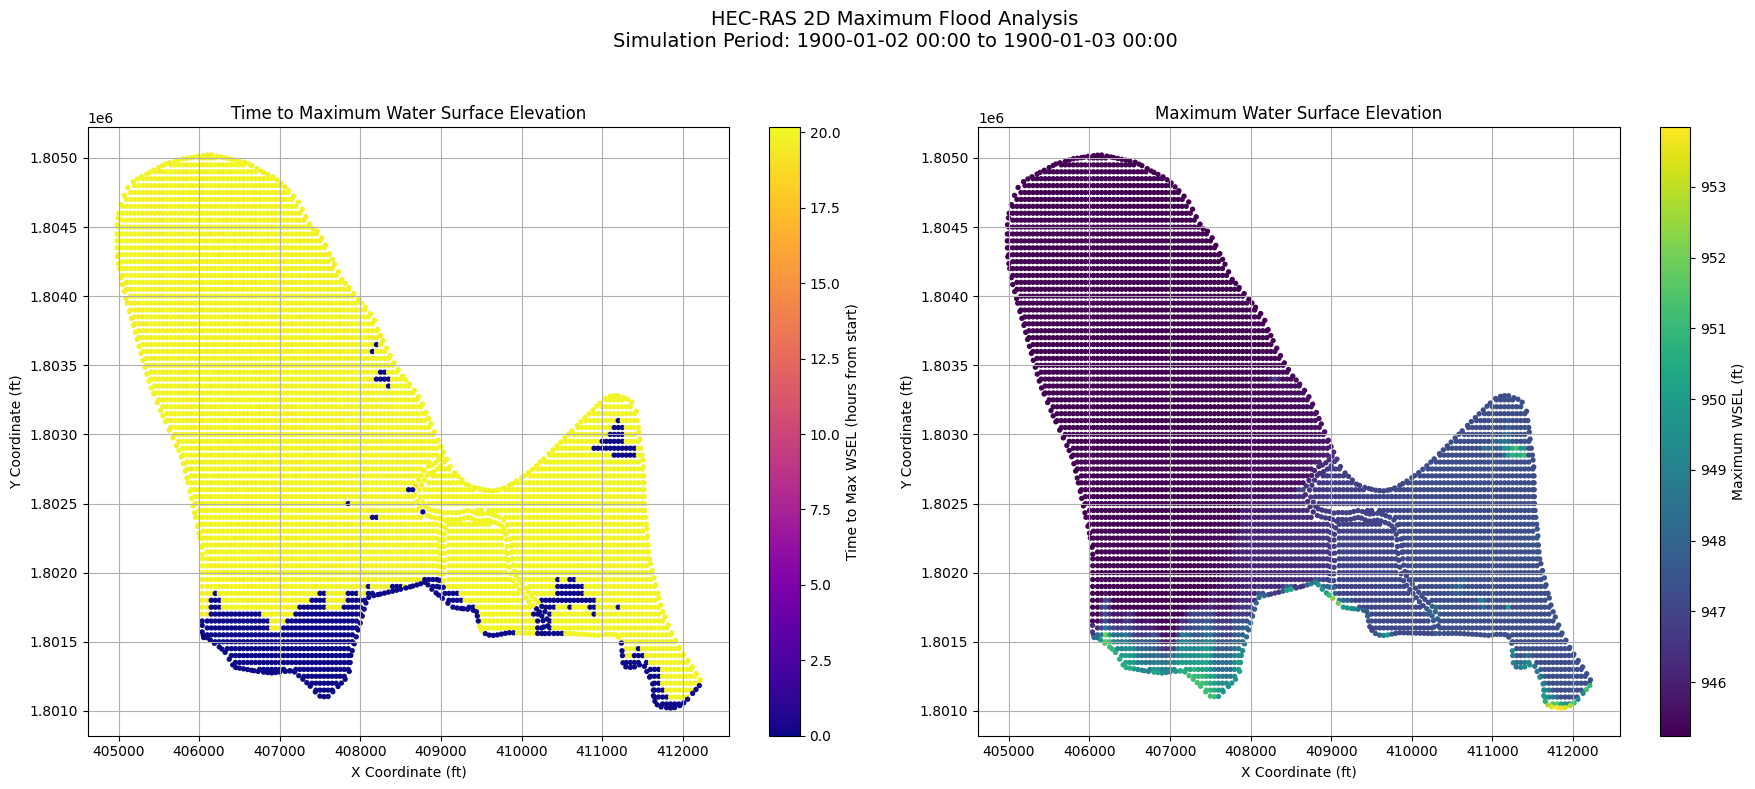


Saving results to RAS_max_wsel_analysis.h5...
Results saved to RAS_max_wsel_analysis.h5

Operation complete!


In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
from matplotlib import cm

def calculate_time_to_max_wsel():
    """
    Calculate the time when each cell reaches its maximum water surface elevation
    in the HEC-RAS 2D simulation and create a visualization.
    """
    # Set file path
    hdf5_path = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
    
    print(f"Processing file: {hdf5_path}")
    if not os.path.exists(hdf5_path):
        print(f"Error: File {hdf5_path} not found")
        return
    
    # Open the HDF5 file
    with h5py.File(hdf5_path, "r") as f:
        # Load water surface elevation data
        print("Loading water surface elevation data...")
        wse_data = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
        
        # Load cell center coordinates
        cell_coords = f["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
        x_coords, y_coords = cell_coords[:, 0], cell_coords[:, 1]
        
        # Load time stamps
        time_stamps = f["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)
        time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")
        
        # Get numeric times in hours from start
        start_time = time_index[0]
        time_hours = np.array([(t - start_time).total_seconds() / 3600 for t in time_index])
        
        # Get dimensions
        num_timesteps, num_cells = wse_data.shape
        
        print(f"Analyzing {num_cells} grid cells across {num_timesteps} time steps...")
        
        # Initialize arrays
        max_wsel = np.full(num_cells, -np.inf)
        time_to_max_wsel = np.full(num_cells, np.nan)
        
        # For each cell, find the time step with maximum water surface elevation
        print("Finding time of maximum water surface elevation for each cell...")
        for cell_idx in range(num_cells):
            cell_wse = wse_data[:, cell_idx]
            
            # Skip cells with no water (all zeros or NaNs)
            if np.all(np.isnan(cell_wse)) or np.all(cell_wse == 0):
                continue
                
            # Find the index of the maximum water surface elevation
            max_idx = np.nanargmax(cell_wse)
            max_wsel[cell_idx] = cell_wse[max_idx]
            time_to_max_wsel[cell_idx] = time_hours[max_idx]
    
    # Create a more informative visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Create masks for valid data
    valid_mask = ~np.isnan(time_to_max_wsel)
    valid_times = time_to_max_wsel[valid_mask]
    valid_x = x_coords[valid_mask]
    valid_y = y_coords[valid_mask]
    valid_wsel = max_wsel[valid_mask]
    
    # Plot 1: Time to Max WSEL
    sc1 = ax1.scatter(
        valid_x, 
        valid_y,
        c=valid_times,
        s=8,
        cmap='plasma',
        vmin=np.min(valid_times),
        vmax=np.max(valid_times)
    )
    
    cbar1 = fig.colorbar(sc1, ax=ax1)
    cbar1.set_label('Time to Max WSEL (hours from start)')
    
    ax1.set_title('Time to Maximum Water Surface Elevation')
    ax1.set_xlabel('X Coordinate (ft)')
    ax1.set_ylabel('Y Coordinate (ft)')
    ax1.grid(True)
    
    # Plot 2: Max WSEL Value
    sc2 = ax2.scatter(
        valid_x, 
        valid_y,
        c=valid_wsel,
        s=8,
        cmap='viridis',
        vmin=np.min(valid_wsel),
        vmax=np.max(valid_wsel)
    )
    
    cbar2 = fig.colorbar(sc2, ax=ax2)
    cbar2.set_label('Maximum WSEL (ft)')
    
    ax2.set_title('Maximum Water Surface Elevation')
    ax2.set_xlabel('X Coordinate (ft)')
    ax2.set_ylabel('Y Coordinate (ft)')
    ax2.grid(True)
    
    # Add overall title with simulation details
    start_date = time_index[0].strftime('%Y-%m-%d %H:%M')
    end_date = time_index[-1].strftime('%Y-%m-%d %H:%M')
    fig.suptitle(f'HEC-RAS 2D Maximum Flood Analysis\nSimulation Period: {start_date} to {end_date}', fontsize=14)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Calculate statistics for reporting
    # Group times into bins to identify patterns
    hist, bin_edges = np.histogram(valid_times, bins=8)
    
    # Find the most common time window for peak flooding
    max_bin_idx = np.argmax(hist)
    peak_time_start = bin_edges[max_bin_idx]
    peak_time_end = bin_edges[max_bin_idx + 1]
    peak_time_pct = (hist[max_bin_idx] / np.sum(hist)) * 100
    
    # Calculate overall time range statistics
    early_time = np.percentile(valid_times, 10)  # 10th percentile
    late_time = np.percentile(valid_times, 90)   # 90th percentile
    median_time = np.median(valid_times)
    
    # Print analysis results
    print("\nHEC-RAS 2D Maximum WSEL Analysis:")
    print(f"- Simulation period: {start_date} to {end_date}")
    print(f"- Median time to peak WSEL: {median_time:.2f} hours from start")
    print(f"- Most cells ({peak_time_pct:.1f}%) reach peak between hour {peak_time_start:.1f} and {peak_time_end:.1f}")
    print(f"- Early peak (10th percentile): {early_time:.2f} hours")
    print(f"- Late peak (90th percentile): {late_time:.2f} hours")
    print(f"- Maximum WSEL range: {np.min(valid_wsel):.2f} to {np.max(valid_wsel):.2f} ft")
    
    # Save the figure
    plt.savefig('ras_time_to_max_wsel.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save results to file
    output_file = "RAS_max_wsel_analysis.h5"
    with h5py.File(output_file, "w") as out_f:
        print(f"\nSaving results to {output_file}...")
        out_f.create_dataset("time_to_max_wsel", data=time_to_max_wsel)
        out_f.create_dataset("max_wsel", data=max_wsel)
        out_f.create_dataset("x_coords", data=x_coords)
        out_f.create_dataset("y_coords", data=y_coords)
        
    print(f"Results saved to {output_file}")
    print("\nOperation complete!")

# Run the function
calculate_time_to_max_wsel()

# Exporting Data to Other Formats

`Provide a comprehensive list of file formats that can be used to export the data in this notebook.  Favor free and open source solutions.`

# Comprehensive List of Data Export Formats

Here's a comprehensive list of file formats for exporting the HDF5 hydraulic modeling data in this notebook, focusing on free and open-source solutions:

## Spatial Data Formats

### Vector Formats
- **GeoJSON** - Open format for encoding geographic data structures
- **Shapefile (.shp)** - Common GIS format supported by most GIS software
- **GeoPackage (.gpkg)** - Modern, open SQLite-based format that can store both vector and raster data
- **KML/KMZ** - Google Earth compatible format for visualizing spatial data
- **GML** - Geography Markup Language, XML grammar for expressing geographical features

### Raster Formats
- **GeoTIFF (.tif)** - TIFF with embedded georeferencing information
- **ArcASCII Grid (.asc)** - Simple ASCII grid format for terrain data
- **NetCDF (.nc)** - Self-describing, portable format for array-oriented data

## Tabular and Array Data Formats

- **CSV (.csv)** - Simple text format for tabular data
- **Excel (.xlsx)** - Common spreadsheet format (using open libraries like openpyxl)
- **Parquet (.parquet)** - Columnar storage format optimized for large datasets
- **Feather (.feather)** - Fast, language-agnostic format for data frames
- **JSON (.json)** - Text-based data interchange format
- **SQLite (.db)** - Self-contained, serverless database file
- **NumPy Binary (.npy, .npz)** - Efficient storage for NumPy arrays

## Scientific/Hierarchical Data Formats

- **HDF5 (.h5, .hdf5)** - Hierarchical Data Format, good for complex, heterogeneous data
- **NetCDF-4 (.nc4)** - Network Common Data Form, used for array-oriented scientific data
- **XDMF (.xdmf)** - Light-weight format that can reference HDF5 data for visualization
- **Zarr (.zarr)** - Format for chunked, compressed N-dimensional arrays

## Visualization and Image Formats

- **PNG (.png)** - Lossless raster image format
- **JPEG (.jpg)** - Lossy raster image format
- **SVG (.svg)** - Vector graphics format for scalable visualizations
- **PDF (.pdf)** - Portable Document Format for reports and printable documentation
- **HTML/JavaScript** - Interactive web visualizations (using libraries like Plotly, Bokeh)

## Python-Specific Formats

- **Pickle (.pkl)** - Python-specific serialization format (not recommended for long-term storage)
- **Xarray Datasets (.nc)** - Saved as NetCDF by default
- **Pandas DataFrames** - Can be saved to multiple formats (CSV, Excel, HDF5, etc.)

## Time Series Specific Formats

- **TSV (.tsv)** - Tab-separated values, good for time series data
- **ZRXP (.zrxp)** - For hydrologic time series, used in some water resources applications
- **DSS (.dss)** - Data Storage System, used by HEC software for time series data

## Recommendations for Different Uses

- **For GIS Integration**: GeoPackage or GeoTIFF
- **For Data Analysis**: NetCDF, Parquet, or HDF5
- **For Data Sharing**: CSV or GeoJSON
- **For Web Visualization**: GeoJSON or TopoJSON
- **For Long-term Archival**: NetCDF or HDF5 with thorough metadata

All formats listed above can be created using free, open-source Python libraries such as Pandas, GeoPandas, NumPy, Xarray, and various specialized packages for specific formats.

In [ ]:
## Code to Export Examples

### Export to GeoPackage (requires geopandas)
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame from coordinates and data
geometry = [Point(x, y) for x, y in zip(x_coords, y_coords)]
gdf = gpd.GeoDataFrame(
    {'max_wsel': max_wsel, 'time_to_max': time_to_max_wsel}, 
    geometry=geometry, 
    crs="EPSG:26917"  # UTM Zone 17N (adjust as needed for your data)
)
gdf.to_file("flood_results.gpkg", driver="GPKG")

# Export to NetCDF for scientific data exchange
import xarray as xr

# Create xarray dataset with the analysis results
ds = xr.Dataset(
    data_vars={
        'water_surface_elevation': (['time', 'cell'], wse_data),
        'max_wsel': (['cell'], max_wsel),
        'time_to_max_wsel': (['cell'], time_to_max_wsel)
    },
    coords={
        'time': time_index,
        'x': ('cell', x_coords),
        'y': ('cell', y_coords)
    }
)
ds.to_netcdf("flood_analysis_results.nc")

# Export to CSV for simple data sharing
import pandas as pd

# Create DataFrame with results
df = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'max_wsel': max_wsel,
    'time_to_max_wsel': time_to_max_wsel
})
df.to_csv("flood_results.csv", index=False)

https://claude.ai/share/b670d8b9-8026-428e-80b2-39b52e50d97f